# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Yuliani Purwitasari
- **Email:** yulianipurwitasari19@gmail.com
- **ID Dicoding:** yulianipurwitasari

## Menentukan Pertanyaan Bisnis

1. Apa kategori produk yang paling laris terjual?
2. Bagaimana distribusi pembayaran berdasarkan metode pembayaran yang digunakan oleh pelanggan?
3. Pelanggan mana yang baru-baru ini melakukan pembelian?
4. Berapa kali setiap pelanggan melakukan transaksi?
5. Berapa total pengeluaran yang dilakukan oleh setiap pelanggan?

## Import Semua Packages/Library yang Digunakan

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import numpy as np

## Data Wrangling

### Gathering Data

In [77]:
customers_df = pd.read_csv('data/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [78]:
order_items_df = pd.read_csv('data/order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [79]:
payments_df = pd.read_csv('data/order_payments_dataset.csv')
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [80]:
orders_df = pd.read_csv('data/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [81]:
products_df = pd.read_csv('data/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**Insight :**
- Pada tahap Gathering ini, saya mengumpulkan semua data yang dibutuhkan. 
- Data yang dibutuhkan yaitu dataset customers, order_items, payments, orders, dan products
- Dari setiap tabel akan ditampilkan 5 baris pertama dari dataframe yang dipanggil dengan fungsi .head()


### Assessing Data

**Menilai Data customers_df**

In [82]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [83]:
print("Jumlah duplikasi tabel customers: ", customers_df.duplicated().sum())

Jumlah duplikasi tabel customers:  0


In [84]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


**Insights**

Menilai dataframe customers_df 
- Menampilkan ringkasan informasi dari DataFrame 
- Menghitung dan mencetak jumlah baris yang duplikat dalam DataFrame customers_df
- Menghasilkan statistik deskriptif dari DataFrame customers_df untuk kolom numerik, termasuk count, mean, std, min, 25%, 50%, 75%, dan max. Ini memberikan gambaran umum tentang distribusi dan rentang nilai dalam dataset.

**Menilai Data order_items_df**

In [85]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [86]:
print("Jumlah duplikasi tabel order_items: ", order_items_df.duplicated().sum())

Jumlah duplikasi tabel order_items:  0


In [87]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


**Insights**

Menilai dataframe order_items_df
- Menampilkan ringkasan informasi dari DataFrame 
- Menghitung dan mencetak jumlah baris yang duplikat dalam DataFrame order_items_df
- Menghasilkan statistik deskriptif dari DataFrame order_items_df untuk kolom numerik, termasuk count, mean, std, min, 25%, 50%, 75%, dan max. Ini memberikan gambaran umum tentang distribusi dan rentang nilai dalam dataset.

**Menilai Data payments_df**

In [88]:
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [89]:
print("Jumlah duplikasi tabel payments: ", payments_df.duplicated().sum())

Jumlah duplikasi tabel payments:  0


In [90]:
payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


**Insights**

Menilai dataframe payments_df 
- Menampilkan ringkasan informasi dari DataFrame 
- Menghitung dan mencetak jumlah baris yang duplikat dalam DataFrame payments_df
- Menghasilkan statistik deskriptif dari DataFrame payments_df untuk kolom numerik, termasuk count, mean, std, min, 25%, 50%, 75%, dan max. Ini memberikan gambaran umum tentang distribusi dan rentang nilai dalam dataset.

**Menilai Data orders_df**

In [91]:
orders_df.info()
orders_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [92]:
print("Jumlah duplikasi tabel orders: ", orders_df.duplicated().sum())

Jumlah duplikasi tabel orders:  0


In [93]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


**Insights**

Menilai dataframe orders_df 
- Menampilkan ringkasan informasi dari DataFrame 
- Mengecek jumlah missing values dari dataframe
- Menghitung dan mencetak jumlah baris yang duplikat dalam DataFrame 
- Menghasilkan statistik deskriptif dari DataFrame orders_df untuk kolom numerik, termasuk count, mean, std, min, 25%, 50%, 75%, dan max. Ini memberikan gambaran umum tentang distribusi dan rentang nilai dalam dataset.

**Menilai Data products_df**

In [94]:
products_df.info()
products_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [95]:
print("Jumlah duplikasi tabel products: ", products_df.duplicated().sum())

Jumlah duplikasi tabel products:  0


In [96]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**Insights**

Menilai dataframe products_df 
- Menampilkan ringkasan informasi dari DataFrame 
- Mengecek jumlah missing values dari dataframe
- Menghitung dan mencetak jumlah baris yang duplikat dalam DataFrame 
- Menghasilkan statistik deskriptif dari DataFrame products_df untuk kolom numerik, termasuk count, mean, std, min, 25%, 50%, 75%, dan max. Ini memberikan gambaran umum tentang distribusi dan rentang nilai dalam dataset.

### Cleaning Data

**Membersihkan data customers_df**

**1. Cek Duplikasi**

In [97]:
print("Jumlah duplikasi pada tabel customers : ",customers_df.duplicated().sum())

Jumlah duplikasi pada tabel customers :  0


**2. Cek Missing Values**

In [98]:
print(customers_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None


**3. Evaluasi Kolom customer_zip_code_prefix**

Meskipun kolom customer_zip_code_prefix adalah tipe numerik (int64), nilai ini sebenarnya adalah kode pos yang seharusnya diperlakukan sebagai data kategorikal atau string karena tidak dimaksudkan untuk digunakan dalam operasi numerik. Untuk ini, ubah tipe datanya menjadi string

In [99]:
customers_df['customer_zip_code_prefix'] = customers_df['customer_zip_code_prefix'].astype(str)

**4. Cek Hasil Perubahan Tipe Data** 

In [100]:
print(customers_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  object
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB
None


**Membersihkan Data order_items_df**

**1. Cek Duplikasi**

In [101]:
print("Jumlah duplikasi pada tabel order_items : ", order_items_df.duplicated().sum())

Jumlah duplikasi pada tabel order_items :  0


**2. Cek Missing Value**

In [102]:
print(order_items_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None


**3. Ubah Tipe Data shipping_limit_date**

Kolom shipping_limit_date memiliki tipe data object, namun data tersebut merupakan tanggal sehingga diubah menjadi datetime

In [103]:
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

**4. Cek Ubah Tipe Data**

In [104]:
print(order_items_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB
None


**Membersihkan Data payments_df**

**1. Mengecek Data yang Berharga 0**


Mengecek data dengan payment_value = 0

In [105]:

payments_zero_value = payments_df[payments_df['payment_value'] == 0]
print(payments_zero_value)

                                order_id  payment_sequential payment_type  \
19922   8bcbe01d44d147f901cd3192671144db                   4      voucher   
36822   fa65dad1b0e818e3ccc5cb0e39231352                  14      voucher   
43744   6ccb433e00daae1283ccc956189c82ae                   4      voucher   
51280   4637ca194b6387e2d538dc89b124b0ee                   1  not_defined   
57411   00b1cb0320190ca0daa2c88b35206009                   1  not_defined   
62674   45ed6e85398a87c253db47c2d9f48216                   3      voucher   
77885   fa65dad1b0e818e3ccc5cb0e39231352                  13      voucher   
94427   c8c528189310eaa44a745b8d9d26908b                   1  not_defined   
100766  b23878b3e8eb4d25a158f57d96331b18                   4      voucher   

        payment_installments  payment_value  
19922                      1            0.0  
36822                      1            0.0  
43744                      1            0.0  
51280                      1            0.0  

Mengecek data dengan payment_installments = 0

In [106]:

payments_zero_installments = payments_df[payments_df['payment_installments'] == 0]
print(payments_zero_installments)

                               order_id  payment_sequential payment_type  \
46982  744bade1fcf9ff3f31d860ace076d422                   2  credit_card   
79014  1a57108394169c0b47d8f876acc9ba2d                   2  credit_card   

       payment_installments  payment_value  
46982                     0          58.69  
79014                     0         129.94  


Menghapus baris yang berharga 0

In [107]:
# Menghapus baris dengan payment_value = 0
payments_df = payments_df[payments_df['payment_value'] > 0]

# Menghapus baris dengan payment_installments = 0
payments_df = payments_df[payments_df['payment_installments'] > 0]


In [108]:
# Mengecek perubahan
# Mengecek data dengan payment_value = 0
payments_zero_value = payments_df[payments_df['payment_value'] == 0]
print(payments_zero_value)

# Mengecek data dengan payment_installments = 0
payments_zero_installments = payments_df[payments_df['payment_installments'] == 0]
print(payments_zero_installments)


Empty DataFrame
Columns: [order_id, payment_sequential, payment_type, payment_installments, payment_value]
Index: []
Empty DataFrame
Columns: [order_id, payment_sequential, payment_type, payment_installments, payment_value]
Index: []


**2. Cek Data Duplikat**

In [109]:
print("Jumlah duplikasi pada tabel payments : ", payments_df.duplicated().sum())

Jumlah duplikasi pada tabel payments :  0


**3. Cek Missing Values**

In [110]:
print(payments_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 103875 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103875 non-null  object 
 1   payment_sequential    103875 non-null  int64  
 2   payment_type          103875 non-null  object 
 3   payment_installments  103875 non-null  int64  
 4   payment_value         103875 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.8+ MB
None


**Membersihkan Data orders_df**

**1. Menghapus Nilai Null (Missing Values)**

In [111]:
print(orders_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None


In [112]:
# Melihat baris dengan nilai null pada kolom tertentu
orders_df[orders_df['order_approved_at'].isnull()]

# Menghapus baris dengan nilai null pada kolom waktu pengiriman dan persetujuan
orders_df_clean = orders_df.dropna(subset=['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'])


**2. Mengubah Tipe Data**

Kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date diubah ke format datetime

In [113]:
# Mengubah kolom ke format datetime
orders_df_clean['order_purchase_timestamp'] = pd.to_datetime(orders_df_clean['order_purchase_timestamp'])
orders_df_clean['order_approved_at'] = pd.to_datetime(orders_df_clean['order_approved_at'])
orders_df_clean['order_delivered_carrier_date'] = pd.to_datetime(orders_df_clean['order_delivered_carrier_date'])
orders_df_clean['order_delivered_customer_date'] = pd.to_datetime(orders_df_clean['order_delivered_customer_date'])


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8036\521985696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_df_clean['order_purchase_timestamp'] = pd.to_datetime(orders_df_clean['order_purchase_timestamp'])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8036\521985696.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_df_clean['order_approved_at'] = pd.to_datetime(orders_df_clean['order_approved_at'])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8036\521985696.py:4: SettingWithCopyWarning: 

**3. Mengecek Duplikasi**

In [114]:
print("Jumlah duplikasi pada tabel orders : ",orders_df.duplicated().sum())

Jumlah duplikasi pada tabel orders :  0


**Membersihkan Data products_df**

**1. Menghapus Nilai Null (Missing Values)**

In [115]:
print(products_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None


Beberapa kolom seperti product_category_name, product_name_lenght, product_description_lenght, dan lainnya mengandung nilai null. Sehingga baris yang bernilai null dihapus dan mengisi nilai null pada kolom yang berisi angka dengan nilai rata-rata

In [116]:
# Menghapus baris dengan nilai null
products_df_clean = products_df.dropna(subset=['product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty'])

# Mengisi nilai null pada kolom yang berisi angka dengan nilai rata-rata
products_df_clean['product_weight_g'].fillna(products_df['product_weight_g'].mean(), inplace=True)
products_df_clean['product_length_cm'].fillna(products_df['product_length_cm'].mean(), inplace=True)
products_df_clean['product_height_cm'].fillna(products_df['product_height_cm'].mean(), inplace=True)
products_df_clean['product_width_cm'].fillna(products_df['product_width_cm'].mean(), inplace=True)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8036\3340421787.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df_clean['product_weight_g'].fillna(products_df['product_weight_g'].mean(), inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8036\3340421787.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_df_clean['p

**2. Mengecek Duplikasi**

In [117]:
print("Jumlah duplikasi pada tabel products : ", products_df.duplicated().sum())

Jumlah duplikasi pada tabel products :  0


**3. Validasi Data**

In [118]:
# Cek apakah masih ada nilai null
products_df_clean.isna().sum()

# Cek ulang tipe data setelah dibersihkan
products_df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 32341 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32341 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32341 non-null  float64
 6   product_length_cm           32341 non-null  float64
 7   product_height_cm           32341 non-null  float64
 8   product_width_cm            32341 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


## Exploratory Data Analysis (EDA)

**Eksplorasi Data customers_df**

EDA : Distribusi Pelanggan Berdasarkan Provinsi

EDA ini menghitung jumlah pelanggan yang terdaftar di setiap provinsi. Dengan melihat distribusi ini, kita dapat mengidentifikasi daerah dengan jumlah pelanggan tertinggi, yang dapat menjadi target utama untuk kampanye pemasaran.

In [119]:
# Menghitung jumlah pelanggan berdasarkan state
customer_distribution = customers_df.groupby('customer_state')['customer_id'].count().reset_index()
customer_distribution.columns = ['Customer State', 'Number of Customers']

# Mengurutkan berdasarkan jumlah pelanggan
customer_distribution = customer_distribution.sort_values(by='Number of Customers', ascending=False)
print(customer_distribution)


   Customer State  Number of Customers
25             SP                41746
18             RJ                12852
10             MG                11635
22             RS                 5466
17             PR                 5045
23             SC                 3637
4              BA                 3380
6              DF                 2140
7              ES                 2033
8              GO                 2020
15             PE                 1652
5              CE                 1336
13             PA                  975
12             MT                  907
9              MA                  747
11             MS                  715
14             PB                  536
16             PI                  495
19             RN                  485
1              AL                  413
24             SE                  350
26             TO                  280
20             RO                  253
2              AM                  148
0              AC        

**Eksplorasi data order_items_df**

EDA: Rata-Rata Harga Produk

Dalam EDA ini, kita menghitung rata-rata harga untuk setiap produk. Ini membantu untuk mengidentifikasi produk dengan harga tinggi, yang mungkin memiliki potensi profitabilitas lebih tinggi atau dapat menunjukkan tren harga di pasar.

In [120]:
# Menghitung rata-rata harga produk
average_price_per_product = order_items_df.groupby('product_id')['price'].mean().reset_index()
average_price_per_product.columns = ['Product ID', 'Average Price']
print(average_price_per_product.sort_values(by='Average Price', ascending=False).head(10))  # 10 produk dengan harga tertinggi

                             Product ID  Average Price
9434   489ae2aa008f021502940f251d4cce7f        6735.00
13693  69c590f7ffc7bf8db97190b6cb6ed62e        6729.00
3698   1bdf5e6731585cf01aa8169c7028d6ad        6499.00
21316  a6492cc69376c469ab6f61d8f44de961        4799.00
25197  c3ed642d592594bb648ff4a04cee2747        4690.00
4967   259037a6a41845e455183f89c5035f18        4590.00
20782  a1beef8f3992dbd4cd8726796aa69c53        4399.87
14070  6cdf8fc1d741c76586d8b6b15e9eef30        4099.99
13591  6902c1962dd19d540807d0ab8fade5c6        3999.90
9968   4ca7b91a31637bd24fb8e559d5e015e4        3999.00


EDA : Distribusi Harga 

In [121]:
# Melihat struktur data
order_items_df.info()

# Melihat distribusi harga
price_distribution = order_items_df['price'].describe()
price_distribution


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

**Eksplorasi Data payments_df**

EDA: Total Nilai Pembayaran Berdasarkan Jenis Pembayaran

Analisis ini mengelompokkan nilai pembayaran berdasarkan jenis pembayaran (misalnya, kartu kredit, transfer bank). Hal ini memberikan wawasan tentang preferensi pembayaran pelanggan dan membantu dalam merencanakan strategi pembayaran yang lebih baik.

In [122]:
# Menghitung total nilai pembayaran berdasarkan jenis pembayaran
payment_summary = payments_df.groupby('payment_type')['payment_value'].sum().reset_index()
payment_summary.columns = ['Payment Type', 'Total Payment Value']
print(payment_summary)

  Payment Type  Total Payment Value
0       boleto           2869361.27
1  credit_card          12541895.56
2   debit_card            217989.79
3      voucher            379436.87


EDA : Distribusi metode pembayaran

In [123]:
payment_distribution = payments_df['payment_type'].value_counts()
payment_distribution


payment_type
credit_card    76793
boleto         19784
voucher         5769
debit_card      1529
Name: count, dtype: int64

**Eksplorasi Data orders_df**

EDA : Status Pesanan

Analisis ini mengelompokkan pesanan berdasarkan statusnya, seperti "delivered," "canceled," atau "shipped." Hasilnya memberikan gambaran tentang efisiensi proses pengiriman dan masalah yang mungkin terjadi dalam pemenuhan pesanan.

In [124]:
# Menghitung jumlah pesanan berdasarkan status
order_status_distribution = orders_df.groupby('order_status')['order_id'].count().reset_index()
order_status_distribution.columns = ['Order Status', 'Number of Orders']
print(order_status_distribution)

  Order Status  Number of Orders
0     approved                 2
1     canceled               625
2      created                 5
3    delivered             96478
4     invoiced               314
5   processing               301
6      shipped              1107
7  unavailable               609


EDA : Menghitung Jumlah Status Pesanan per Kategori

In [125]:
order_status_counts = orders_df['order_status'].value_counts()
order_status_counts

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

**Eksplorasi Data products_df**

EDA : Rata-Rata Berat Produk

EDA ini menghitung rata-rata berat produk untuk setiap kategori. Dengan memahami berat rata-rata, perusahaan dapat merencanakan logistik dan pengiriman lebih efisien, serta mengoptimalkan biaya pengiriman.

In [126]:
# Menghitung rata-rata berat produk
average_weight_per_product = products_df.groupby('product_category_name')['product_weight_g'].mean().reset_index()
average_weight_per_product.columns = ['Product Category', 'Average Weight (g)']
print(average_weight_per_product.sort_values(by='Average Weight (g)', ascending=False).head(10))  # 10 kategori produk dengan berat rata-rata tertinggi

                                  Product Category  Average Weight (g)
52                       moveis_colchao_e_estofado        13190.000000
55                               moveis_escritorio        12740.867314
53  moveis_cozinha_area_de_servico_jantar_e_jardim        11598.563830
56                                   moveis_quarto         9997.222222
29                              eletrodomesticos_2         9913.333333
57                                     moveis_sala         8934.846154
61                                             pcs         7995.333333
43                   industria_comercio_e_negocios         5929.191176
0                        agro_industria_e_comercio         5263.405405
19                                    climatizacao         4459.959677


**Eksplorasi Data all_df**

In [127]:
# Menggabungkan DataFrame dengan melakukan merge berdasarkan kolom yang relevan
# Menggabungkan orders dengan customers
merged_df = pd.merge(orders_df, customers_df, on='customer_id', how='left')

# Menggabungkan dengan order_items
merged_df = pd.merge(merged_df, order_items_df, on='order_id', how='left')

# Menggabungkan dengan payments
merged_df = pd.merge(merged_df, payments_df, on='order_id', how='left')

# Menggabungkan dengan products
all_df = pd.merge(merged_df, products_df, on='product_id', how='left')

# Melihat informasi dari DataFrame gabungan
print(all_df.info())

all_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118428 entries, 0 to 118427
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       118428 non-null  object        
 1   customer_id                    118428 non-null  object        
 2   order_status                   118428 non-null  object        
 3   order_purchase_timestamp       118428 non-null  object        
 4   order_approved_at              118252 non-null  object        
 5   order_delivered_carrier_date   116354 non-null  object        
 6   order_delivered_customer_date  115033 non-null  object        
 7   order_estimated_delivery_date  118428 non-null  object        
 8   customer_unique_id             118428 non-null  object        
 9   customer_zip_code_prefix       118428 non-null  object        
 10  customer_city                  118428 non-null  object        
 11  

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,payment_installments,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,1.0,18.12,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,1.0,2.00,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,1.0,18.59,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,1.0,141.46,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,3.0,179.12,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0


## Menggabungkan Data untuk RFM Analysis

In [128]:
# Menggabungkan datasets berdasarkan order_id
merged_df = pd.merge(orders_df, order_items_df, on='order_id')
merged_df = pd.merge(merged_df, payments_df, on='order_id')

# Konversi tipe waktu
merged_df['order_purchase_timestamp'] = pd.to_datetime(merged_df['order_purchase_timestamp'])

# Melihat data gabungan
merged_df.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,1,credit_card,3,179.12


**Insights:**
- Tujuan dari kode tersebut adalah untuk menggabungkan tiga DataFrame (orders_df, order_items_df, dan payments_df) berdasarkan kolom order_id. Setelah penggabungan, kolom order_purchase_timestamp diubah menjadi tipe data waktu (datetime). Ini bertujuan untuk menyatukan informasi terkait pesanan, item, dan pembayaran ke dalam satu DataFrame (merged_df) yang lebih komprehensif. Dengan cara ini, analisis data dapat dilakukan dengan lebih efisien, dan data yang relevan dapat diakses dengan mudah.

## Visualization & Explanatory Analysis

### Pertanyaan 1: 

Apa kategori produk yang paling laris terjual?

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8036\1646904144.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_sales.head(10), x='order_item_id', y='product_category_name', palette='viridis')


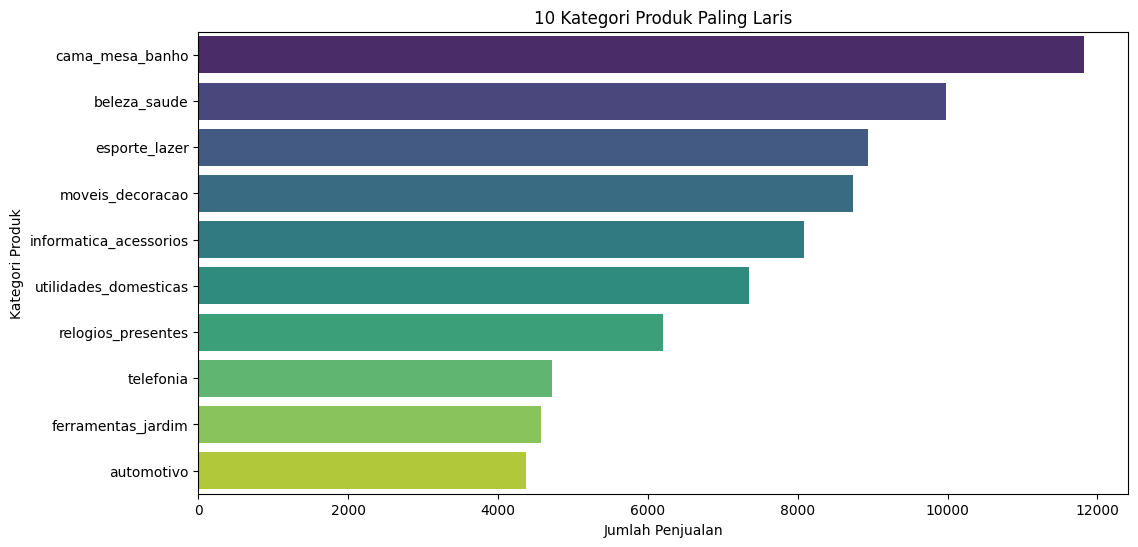

In [129]:
# Menghitung jumlah penjualan per kategori produk
category_sales = all_df.groupby('product_category_name')['order_item_id'].count().reset_index()
category_sales = category_sales.sort_values(by='order_item_id', ascending=False)

# Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(data=category_sales.head(10), x='order_item_id', y='product_category_name', palette='viridis')
plt.title('10 Kategori Produk Paling Laris')
plt.xlabel('Jumlah Penjualan')
plt.ylabel('Kategori Produk')
plt.show()

### Pertanyaan 2:

Bagaimana distribusi pembayaran berdasarkan metode pembayaran yang digunakan oleh pelanggan?

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8036\517247538.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=payment_distribution, x='payment_type', y='payment_value', palette='magma')


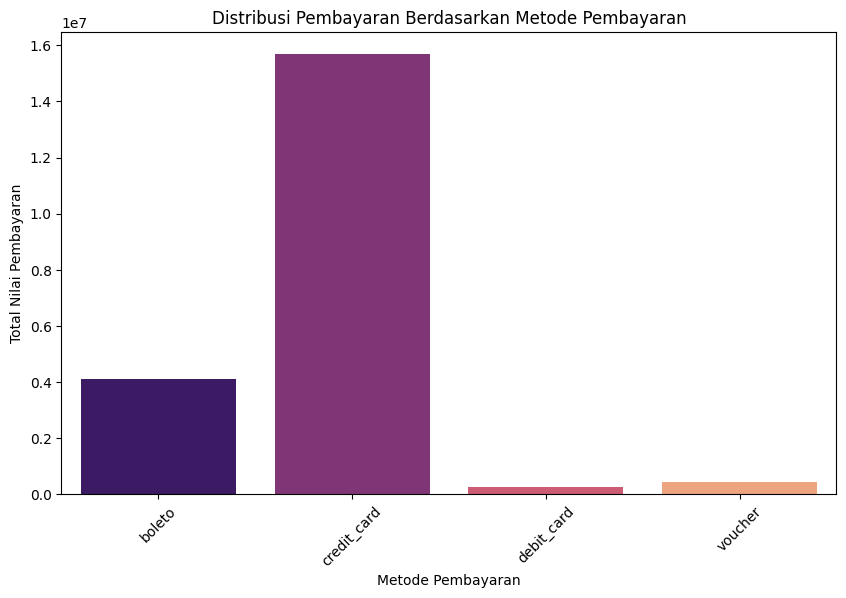

In [130]:
# Menghitung distribusi pembayaran berdasarkan metode pembayaran
payment_distribution = all_df.groupby('payment_type')['payment_value'].sum().reset_index()

# Visualisasi distribusi pembayaran berdasarkan metode pembayaran
plt.figure(figsize=(10, 6))
sns.barplot(data=payment_distribution, x='payment_type', y='payment_value', palette='magma')
plt.title('Distribusi Pembayaran Berdasarkan Metode Pembayaran')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Total Nilai Pembayaran')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


### RFM Analysis untuk Pertanyaan 3, 4 dan 5

**a. Recency**

Menghitung jumlah hari sejak transaksi terakhir setiap pelanggan

In [131]:
# Tentukan tanggal referensi untuk menghitung recency (misal, tanggal terakhir transaksi pada dataset)
reference_date = merged_df['order_purchase_timestamp'].max()

# Hitung recency
recency_df = merged_df.groupby('customer_id').agg({'order_purchase_timestamp': lambda x: (reference_date - x.max()).days})
recency_df.columns = ['recency']
recency_df.reset_index(inplace=True)
recency_df.head()


,customer_id,recency
0,00012a2ce6f8dcda20d059ce98491703,292
1,000161a058600d5901f007fab4c27140,413
2,0001fd6190edaaf884bcaf3d49edf079,551
3,0002414f95344307404f0ace7a26f1d5,382
4,000379cdec625522490c315e70c7a9fb,153


**b. Frequency**

Menghitung jumlah total transaksi (frequency) yang dilakukan setiap pelanggan

In [132]:
# Hitung frequency
frequency_df = merged_df.groupby('customer_id').agg({'order_id': 'nunique'})
frequency_df.columns = ['frequency']
frequency_df.reset_index(inplace=True)
frequency_df.head()

,customer_id,frequency
0,00012a2ce6f8dcda20d059ce98491703,1
1,000161a058600d5901f007fab4c27140,1
2,0001fd6190edaaf884bcaf3d49edf079,1
3,0002414f95344307404f0ace7a26f1d5,1
4,000379cdec625522490c315e70c7a9fb,1


**c. Monetary**

In [133]:
# Hitung monetary
monetary_df = merged_df.groupby('customer_id').agg({'payment_value': 'sum'})
monetary_df.columns = ['monetary']
monetary_df.reset_index(inplace=True)
monetary_df.head()

,customer_id,monetary
0,00012a2ce6f8dcda20d059ce98491703,114.74
1,000161a058600d5901f007fab4c27140,67.41
2,0001fd6190edaaf884bcaf3d49edf079,195.42
3,0002414f95344307404f0ace7a26f1d5,179.35
4,000379cdec625522490c315e70c7a9fb,107.01


**Menggabunkan Recency, Frequency, dan Monetary**

In [134]:
# Menggabungkan ketiga komponen RFM
rfm_df = pd.merge(recency_df, frequency_df, on='customer_id')
rfm_df = pd.merge(rfm_df, monetary_df, on='customer_id')

# Melihat data RFM
rfm_df.head()

,customer_id,recency,frequency,monetary
0,00012a2ce6f8dcda20d059ce98491703,292,1,114.74
1,000161a058600d5901f007fab4c27140,413,1,67.41
2,0001fd6190edaaf884bcaf3d49edf079,551,1,195.42
3,0002414f95344307404f0ace7a26f1d5,382,1,179.35
4,000379cdec625522490c315e70c7a9fb,153,1,107.01


### Visualisasi dari RFM Analysis

**Recency Distribution**

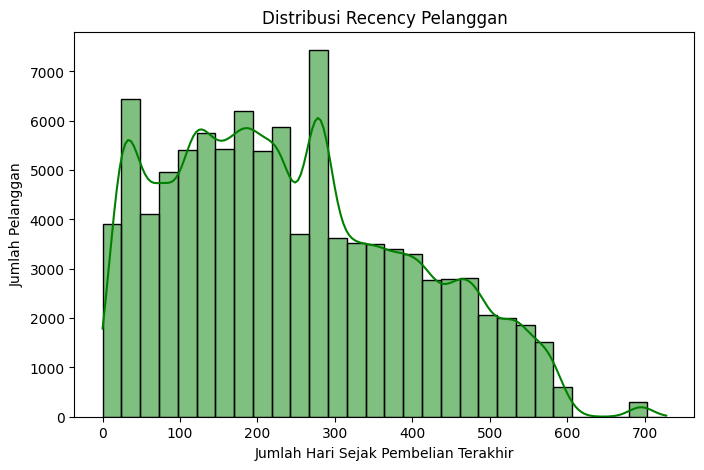

In [135]:
plt.figure(figsize=(8,5))
sns.histplot(rfm_df['recency'], bins=30, kde=True, color='green')
plt.title('Distribusi Recency Pelanggan')
plt.xlabel('Jumlah Hari Sejak Pembelian Terakhir')
plt.ylabel('Jumlah Pelanggan')
plt.show()

**Frequency Distribution**

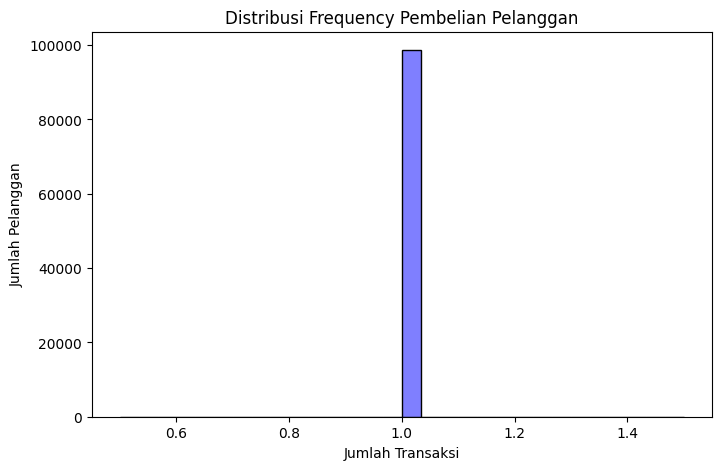

In [136]:
plt.figure(figsize=(8,5))
sns.histplot(rfm_df['frequency'], bins=30, kde=True, color='blue')
plt.title('Distribusi Frequency Pembelian Pelanggan')
plt.xlabel('Jumlah Transaksi')
plt.ylabel('Jumlah Pelanggan')
plt.show()

**Monetary Distribution**

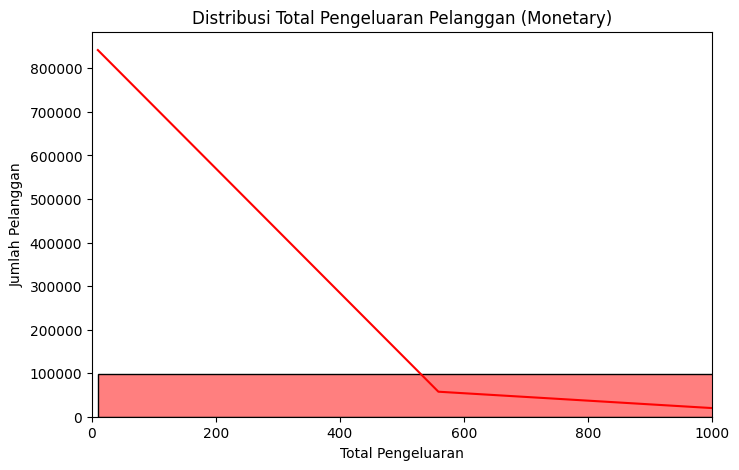

In [137]:
plt.figure(figsize=(8, 5))
sns.histplot(rfm_df['monetary'], bins=30, kde=True, color='red')
plt.title('Distribusi Total Pengeluaran Pelanggan (Monetary)')
plt.xlabel('Total Pengeluaran')
plt.ylabel('Jumlah Pelanggan')
plt.xlim(0, 1000)  # Menetapkan batas maksimum sumbu x
plt.show()

# Conclution

**Conclution pertanyaan 1**

- Dari visualisasi yang menunjukkan kategori produk paling laris, dapat dilihat bahwa kategori cama_mesa_banho menjadi yang terlaris dengan hampir 12.000 penjualan. Kategori ini diikuti oleh beleza_saude dan esporte_lazer, yang juga menunjukkan penjualan yang tinggi. Ini menunjukkan bahwa produk dalam kategori rumah tangga dan kesehatan memiliki permintaan yang signifikan.


**Conclution Pertanyaan 2**
- Kartu kredit adalah metode pembayaran yang paling sering digunakan, dengan total nilai pembayaran yang jauh lebih tinggi dibandingkan metode lain. Selain itu, pembayaran dengan boleto menempati urutan kedua, sementara penggunaan debit card dan voucher relatif lebih rendah. Ini mengindikasikan bahwa mayoritas pelanggan cenderung menggunakan kartu kredit untuk pembelian mereka.

**Conclution Pertanyaan 3**
- Sebagian besar pelanggan melakukan pembelian dalam jangka waktu kurang dari 300 hari. Terlihat lonjakan jumlah pelanggan pada rentang 0-300 hari sejak pembelian terakhir. Ini mengindikasikan bahwa sebagian besar basis pelanggan masih cukup aktif melakukan pembelian.
- Ada penurunan jumlah pelanggan yang signifikan setelah 300 hari: Setelah melewati titik 300 hari, jumlah pelanggan yang melakukan pembelian secara signifikan menurun. Ini menunjukkan adanya penurunan keterlibatan pelanggan setelah jangka waktu tertentu.
- Ada beberapa pelanggan yang memiliki jangka waktu sangat lama sejak pembelian terakhir. Terdapat beberapa pelanggan yang melakukan pembelian terakhir lebih dari 600 hari yang lalu. Ini menunjukkan adanya kelompok pelanggan yang tidak aktif atau mungkin sudah churn (berhenti menjadi pelanggan).

**Conclution Pertanyaan 4**
- Sebagian besar pelanggan melakukan satu kali transaksi. Terlihat lonjakan yang sangat tinggi pada jumlah pelanggan di angka 1 transaksi. Ini mengindikasikan bahwa mayoritas pelanggan hanya melakukan pembelian satu kali.
- Grafik menunjukkan penurunan yang sangat tajam pada jumlah pelanggan setelah angka 1 transaksi. Ini berarti sangat sedikit pelanggan yang melakukan lebih dari satu kali transaksi dalam periode tersebut.

**Conclution Pertanyaan 5**
- Sebagian besar pelanggan cenderung melakukan pengeluaran yang relatif kecil. Terlihat penurunan yang sangat tajam pada jumlah pelanggan setelah kisaran 200. Ini mengindikasikan bahwa mayoritas pelanggan hanya melakukan transaksi dengan nilai yang tidak terlalu besar.
- Ada segmen pelanggan yang melakukan pengeluaran tinggi. Meskipun jumlahnya lebih sedikit, ada kelompok pelanggan yang melakukan pengeluaran di atas 600. Ini menunjukkan adanya kelompok pelanggan yang memberikan kontribusi signifikan terhadap total pendapatan perusahaan.
- Grafik menunjukkan adanya distribusi yang tidak merata. Sebagian besar pelanggan terkonsentrasi pada kisaran pengeluaran yang rendah, sementara hanya sedikit pelanggan yang melakukan pengeluaran yang sangat tinggi.

In [138]:
all_df.to_csv("all_data.csv", index=False)